In [66]:
#Original equation: 0.996x^2 - 1.9343x - 14.149
#R^2 = 0.9993

import pandas as pd
import numpy as np

calc = pd.DataFrame(np.zeros([16,14],dtype=float),columns=['a0','a1','a2','x','Actual y','Predicted y','Diff','sum_Diff','v0', \
                                                          'v1','v2','sum_v0','sum_v1','sum_v2'])

In [67]:
#DF for calculating the gradient vector and cost function (difference in y)

#Initialize values
calc['x'] = [-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]
calc['Actual y'] = [21.21217914,9.001978895,0.747344201,-6.70555256,-11.32007117,-14.36436262,-15.72039677,-13.02638345, \
                    -11.99715765,-5.789431156,1.622636555,10.91513494,20.78728975,34.84557539,48.3673002,65.90865069]

#Number of samples m
m = 16

#Set initial values of a0,a1,a2
calc['a0'] = 0
calc['a1'] = 0
calc['a2'] = 0

for i in range(0,m):
    #Calculate predicted y, difference of y, gradient of a0, a1, a2 (v0, v1, v2)
    calc['Predicted y'][i] = calc['a0'][i] + calc['a1'][i]*calc['x'][i] + calc['a2'][i]*calc['x'][i]**2
    calc['Diff'][i] = 1/(2*m) * (calc['Predicted y'][i] - calc['Actual y'][i])**2
    calc['v0'][i] = 1/m * (calc['Predicted y'][i] - calc['Actual y'][i])
    calc['v1'][i] = 1/m * (calc['Predicted y'][i] - calc['Actual y'][i]) * calc['x'][i]
    calc['v2'][i] = 1/m * (calc['Predicted y'][i] - calc['Actual y'][i]) * calc['x'][i]**2
    #Save values of gradient and difference in new column for cumsum() cumulative sum to operate
    calc['sum_v0'][i] = calc['v0'][i]
    calc['sum_v1'][i] = calc['v1'][i]
    calc['sum_v2'][i] = calc['v2'][i]
    calc['sum_Diff'][i] = calc['Diff'][i]

calc['sum_Diff'] = calc['sum_Diff'].cumsum()
calc['sum_v0'] = calc['sum_v0'].cumsum()
calc['sum_v1'] = calc['sum_v1'].cumsum()
calc['sum_v2'] = calc['sum_v2'].cumsum()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

In [68]:
calc

,a0,a1,a2,x,Actual y,Predicted y,Diff,sum_Diff,v0,v1,v2,sum_v0,sum_v1,sum_v2
0,0,0,0,-5,21.212179,0.0,14.061142,14.061142,-1.325761,6.628806,-33.144030,-1.325761,6.628806,-33.144030
1,0,0,0,-4,9.001979,0.0,2.532363,16.593505,-0.562624,2.250495,-9.001979,-1.888385,8.879301,-42.146009
2,0,0,0,-3,0.747344,0.0,0.017454,16.610959,-0.046709,0.140127,-0.420381,-1.935094,9.019428,-42.566390
3,0,0,0,-2,-6.705553,0.0,1.405139,18.016098,0.419097,-0.838194,1.676388,-1.515997,8.181234,-40.890002
4,0,0,0,-1,-11.320071,0.0,4.004500,22.020598,0.707504,-0.707504,0.707504,-0.808492,7.473729,-40.182497
5,0,0,0,0,-14.364363,0.0,6.447966,28.468564,0.897773,0.000000,0.000000,0.089280,7.473729,-40.182497
6,0,0,0,1,-15.720397,0.0,7.722840,36.191404,0.982525,0.982525,0.982525,1.071805,8.456254,-39.199973
7,0,0,0,2,-13.026383,0.0,5.302708,41.494112,0.814149,1.628298,3.256596,1.885954,10.084552,-35.943377
8,0,0,0,3,-11.997158,0.0,4.497868,45.991981,0.749822,2.249467,6.748401,2.635776,12.334019,-29.194975
9,0,0,0,4,-5.789431,0.0,1.047422,47.039403,0.361839,1.447358,5.789431,2.997616,13.781377,-23.405544


In [69]:
#Number of iterations
n = 100

learn = pd.DataFrame(np.zeros([n,7],dtype=float),columns=['Cost function','a0_rate','a1_rate','a2_rate','new_a0', \
                                                          'new_a1','new_a2'])

In [70]:
learn

,Cost function,a0_rate,a1_rate,a2_rate,new_a0,new_a1,new_a2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
#Converges relatively quickly without oscillation or diverging
#k0 = 0.2
#k1 = 0.002
#k2 = 0.0002
kk0 = []
kk1 = []
kk2 = []

#np.exp(i/40)

for i in range(0,80):
    kk0.append(0.2*(1+i*10/100))
    kk1.append(0.002*(1+i*10/100))
    kk2.append(0.0002*(1+i*10/100))

for i in range(80,n):
    kk0.append(0.2)
    kk1.append(0.002)
    kk2.append(0.0002)

print(kk0)
print(kk1)
print(kk2)

[0.2, 0.22000000000000003, 0.24, 0.26, 0.27999999999999997, 0.30000000000000004, 0.32000000000000006, 0.34, 0.36000000000000004, 0.38, 0.4, 0.42000000000000004, 0.44000000000000006, 0.45999999999999996, 0.48, 0.5, 0.52, 0.54, 0.5599999999999999, 0.58, 0.6000000000000001, 0.6200000000000001, 0.6400000000000001, 0.66, 0.68, 0.7000000000000001, 0.7200000000000001, 0.7400000000000001, 0.76, 0.78, 0.8, 0.82, 0.8400000000000001, 0.86, 0.8800000000000001, 0.9, 0.9199999999999999, 0.9400000000000001, 0.96, 0.9800000000000001, 1.0, 1.02, 1.04, 1.06, 1.08, 1.1, 1.1199999999999999, 1.1400000000000001, 1.16, 1.1800000000000002, 1.2000000000000002, 1.22, 1.2400000000000002, 1.26, 1.2800000000000002, 1.3, 1.32, 1.34, 1.36, 1.3800000000000001, 1.4000000000000001, 1.42, 1.4400000000000002, 1.46, 1.4800000000000002, 1.5, 1.52, 1.54, 1.56, 1.58, 1.6, 1.62, 1.64, 1.6600000000000001, 1.6800000000000002, 1.7000000000000002, 1.72, 1.74, 1.7600000000000002, 1.7800000000000002, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0

In [72]:
#Number of iteration is set to 30 (n=30) based on previous DF

#Learning rate k for a0, a1, a2

#Converges but slow
# k0 = 0.1
# k1 = 0.01
# k2 = 0.001

#Converges but a0 and a1 have slight oscillation
#k0 = 0.13
#k1 = 0.013
#k2 = 0.001

#Converges relatively quickly without oscillation or diverging
#k0 = 0.2
#k1 = 0.002
#k2 = 0.0002


#Set parameters
a0 = 0
a1 = 0
a2 = 0

for j in range(0,n):
    learn['Cost function'][j] = calc['sum_Diff'][15]
    learn['a0_rate'][j] = kk0[j]*calc['sum_v0'][15]
    learn['a1_rate'][j] = kk1[j]*calc['sum_v1'][15]
    learn['a2_rate'][j] = kk2[j]*calc['sum_v2'][15]
    a0 -= learn['a0_rate'][j]
    a1 -= learn['a1_rate'][j]
    a2 -= learn['a2_rate'][j]
    learn['new_a0'][j] = a0
    learn['new_a1'][j] = a1
    learn['new_a2'][j] = a2
    #New cost function after changing parameters
    
    #Remember to change values of a0,a1,a2 before calculating
    calc['a0'] = a0
    calc['a1'] = a1
    calc['a2'] = a2
    
    for i in range(0,m):
        #Calculate predicted y, difference of y, gradient of a0, a1, a2 (v0, v1, v2)
        calc['Predicted y'][i] = calc['a0'][i] + calc['a1'][i]*calc['x'][i] + calc['a2'][i]*calc['x'][i]**2
        calc['Diff'][i] = 1/(2*m) * (calc['Predicted y'][i] - calc['Actual y'][i])**2
        calc['v0'][i] = 1/m * (calc['Predicted y'][i] - calc['Actual y'][i])
        calc['v1'][i] = 1/m * (calc['Predicted y'][i] - calc['Actual y'][i]) * calc['x'][i]
        calc['v2'][i] = 1/m * (calc['Predicted y'][i] - calc['Actual y'][i]) * calc['x'][i]**2
        #Save values of gradient and difference in new column for cumsum() cumulative sum to operate
        calc['sum_v0'][i] = calc['v0'][i]
        calc['sum_v1'][i] = calc['v1'][i]
        calc['sum_v2'][i] = calc['v2'][i]
        calc['sum_Diff'][i] = calc['Diff'][i]

    #Calculate summations for gradient vector and cost function to be used in the calculation DF
    calc['sum_Diff'] = calc['sum_Diff'].cumsum()
    calc['sum_v0'] = calc['sum_v0'].cumsum()
    calc['sum_v1'] = calc['sum_v1'].cumsum()
    calc['sum_v2'] = calc['sum_v2'].cumsum()
    

    
    
    
    


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

In [73]:
learn

,Cost function,a0_rate,a1_rate,a2_rate,new_a0,new_a1,new_a2
0,311.147048,-1.681059,-0.171471,-0.182066,1.681059,0.171471,0.182066
1,160.249329,-0.283521,-0.098903,-0.117631,1.964581,0.270374,0.299698
2,107.117261,0.594457,-0.050260,-0.075873,1.370124,0.320635,0.375571
3,84.903162,1.064598,-0.020197,-0.051718,0.305526,0.340831,0.427289
4,71.486086,1.260771,-0.002305,-0.039090,-0.955245,0.343137,0.466379
5,61.054430,1.296818,0.008787,-0.032878,-2.252063,0.334350,0.499257
6,52.355965,1.250584,0.016636,-0.029672,-3.502646,0.317714,0.528929
7,45.085673,1.166839,0.023145,-0.027619,-4.669485,0.294569,0.556547
8,39.064896,1.068009,0.029114,-0.025902,-5.737494,0.265455,0.582450
9,34.115947,0.964522,0.034768,-0.024251,-6.702016,0.230688,0.606701


In [74]:
calc

,a0,a1,a2,x,Actual y,Predicted y,Diff,sum_Diff,v0,v1,v2,sum_v0,sum_v1,sum_v2
0,-14.142845,-1.929241,0.995335,-5,21.212179,20.386736,0.021292,0.021292,-0.051590,0.257951,-1.289754,-0.051590,0.257951,-1.289754
1,-14.142845,-1.929241,0.995335,-4,9.001979,9.499480,0.007735,0.029027,0.031094,-0.124375,0.497501,-0.020496,0.133576,-0.792254
2,-14.142845,-1.929241,0.995335,-3,0.747344,0.602893,0.000652,0.029679,-0.009028,0.027085,-0.081254,-0.029525,0.160660,-0.873508
3,-14.142845,-1.929241,0.995335,-2,-6.705553,-6.303023,0.005063,0.034742,0.025158,-0.050316,0.100632,-0.004367,0.110344,-0.772875
4,-14.142845,-1.929241,0.995335,-1,-11.320071,-11.218269,0.000324,0.035066,0.006363,-0.006363,0.006363,0.001996,0.103982,-0.766513
5,-14.142845,-1.929241,0.995335,0,-14.364363,-14.142845,0.001533,0.036600,0.013845,0.000000,0.000000,0.015841,0.103982,-0.766513
6,-14.142845,-1.929241,0.995335,1,-15.720397,-15.076751,0.012946,0.049546,0.040228,0.040228,0.040228,0.056069,0.144209,-0.726285
7,-14.142845,-1.929241,0.995335,2,-13.026383,-14.019986,0.030851,0.080397,-0.062100,-0.124200,-0.248401,-0.006031,0.020009,-0.974685
8,-14.142845,-1.929241,0.995335,3,-11.997158,-10.972551,0.032807,0.113204,0.064038,0.192114,0.576341,0.058007,0.212123,-0.398344
9,-14.142845,-1.929241,0.995335,4,-5.789431,-5.934445,0.000657,0.113861,-0.009063,-0.036254,-0.145014,0.048943,0.175869,-0.543358


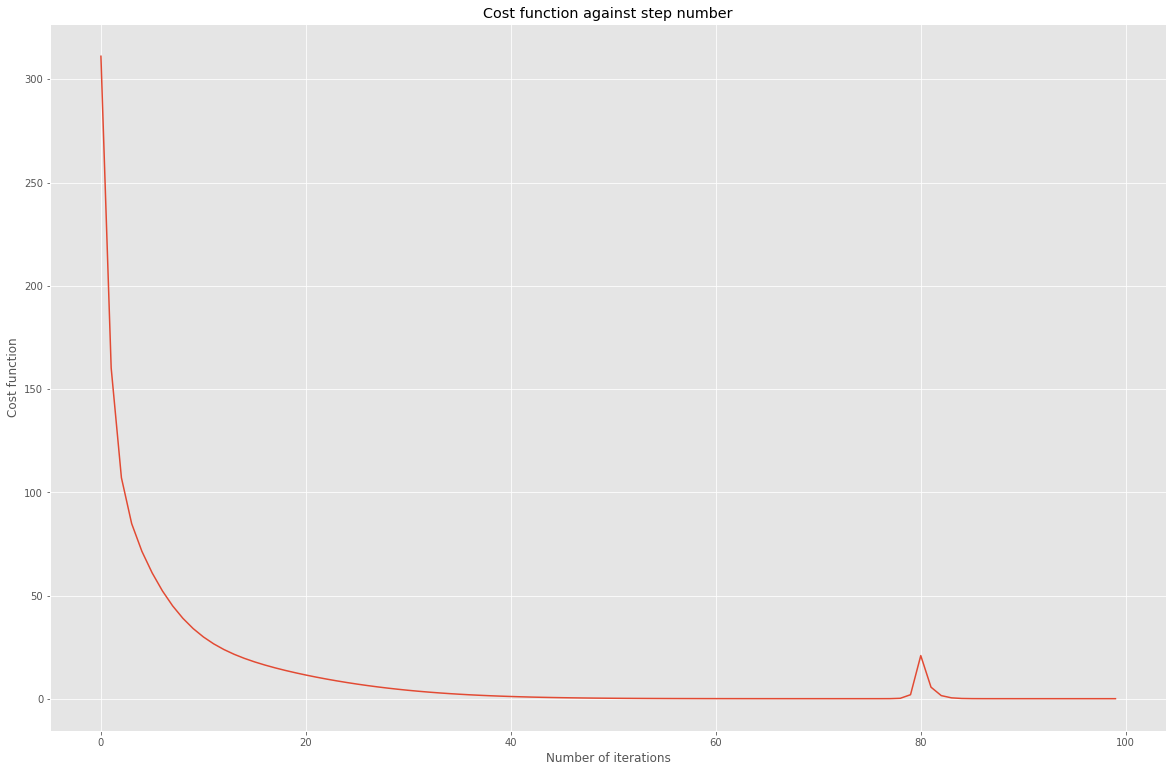

In [75]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
plt.plot(learn.index.values,learn['Cost function'].values)
plt.title('Cost function against step number')
plt.xlabel('Number of iterations')
plt.ylabel('Cost function')
plt.savefig('Error_function.png')


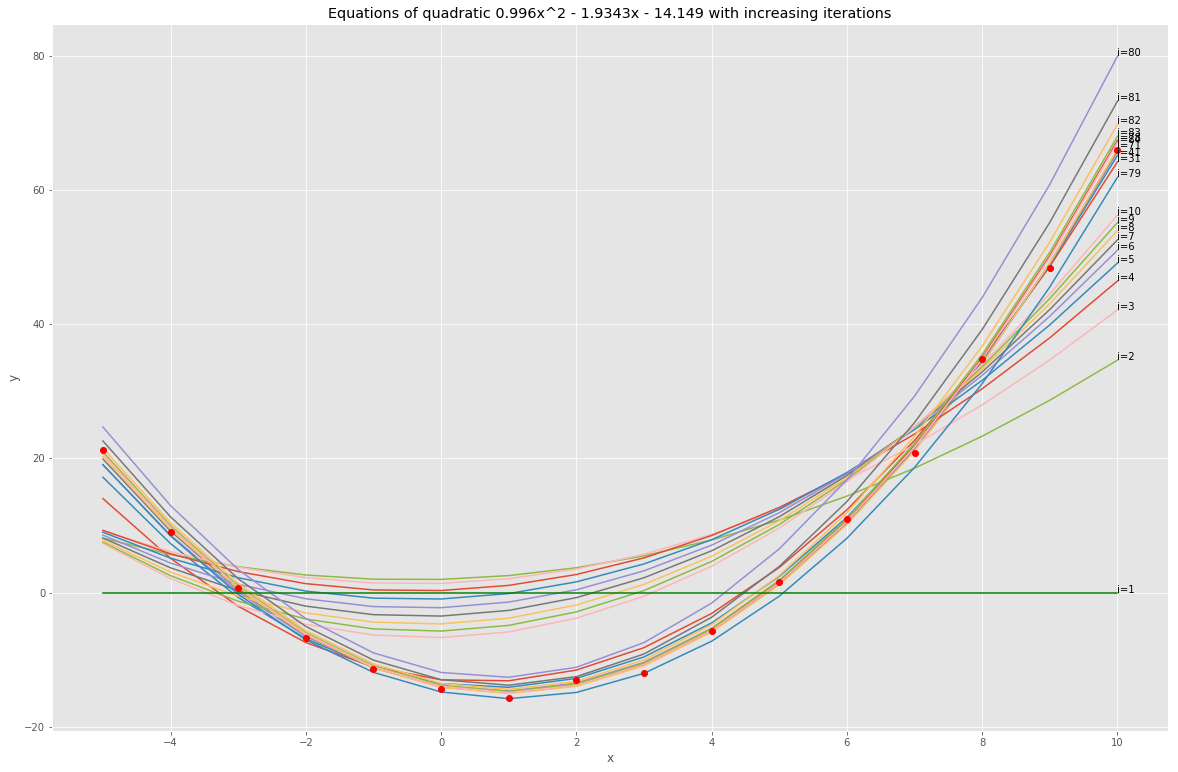

In [87]:
x = [-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]
y = []

plt.rcParams["figure.figsize"] = (20,13)

#get 5 graphs, use a0,a1,a2 of iteration 30,40,50,60,70 which is actually step 31,41,51,61,71
for i in range(3,8):
    #Reset y
    y = []
    #16 points from -5 to 10
    for j in range(0,16):
        y.append(learn['new_a0'][i*10]+learn['new_a1'][i*10]*x[j]+learn['new_a2'][i*10]*(x[j]**2))
    plt.plot(x,y)
    if i != 5 and i !=6:
        plt.text(10, y[15], 'i='+str(i*10+1))



#get 9 graphs from iteration 1-9 which is step 2-10 (iteration 0,10 or step 1,11 are covered by above)
for i in range(1,10):
    #Reset y
    y = []
    #16 points from -5 to 10
    for j in range(0,16):
        y.append(learn['new_a0'][i]+learn['new_a1'][i]*x[j]+learn['new_a2'][i]*(x[j]**2))
    plt.plot(x,y)
    plt.text(10, y[15], 'i='+str(i+1))

#Plot graphs from iteration number from 77-83 to see overfitting and recalibrating
for i in range(77,84):
    #Reset y
    y = []
    #16 points from -5 to 10
    for j in range(0,16):
        y.append(learn['new_a0'][i]+learn['new_a1'][i]*x[j]+learn['new_a2'][i]*(x[j]**2))
    plt.plot(x,y)
    plt.text(10, y[15], 'i='+str(i+1))
    
plt.plot(x,[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],'g-') #baseline with green line 'g-'
plt.plot(x, [21.21217914,9.001978895,0.747344201,-6.70555256,-11.32007117,-14.36436262,-15.72039677,-13.02638345, \
                    -11.99715765,-5.789431156,1.622636555,10.91513494,20.78728975,34.84557539,48.3673002,65.90865069], 'ro')
plt.title('Equations of quadratic 0.996x^2 - 1.9343x - 14.149 with increasing iterations')
plt.xlabel('x')
plt.ylabel('y')
plt.text(10, 0, r'i=1')
plt.savefig('Gradient_descent.png')


#Actual best fit line
#a0= -13.970346 a1=-1.911492 a2=0.987684

Text(-16,0,'Change in parameters a0,a1,a2 over 80 steps')

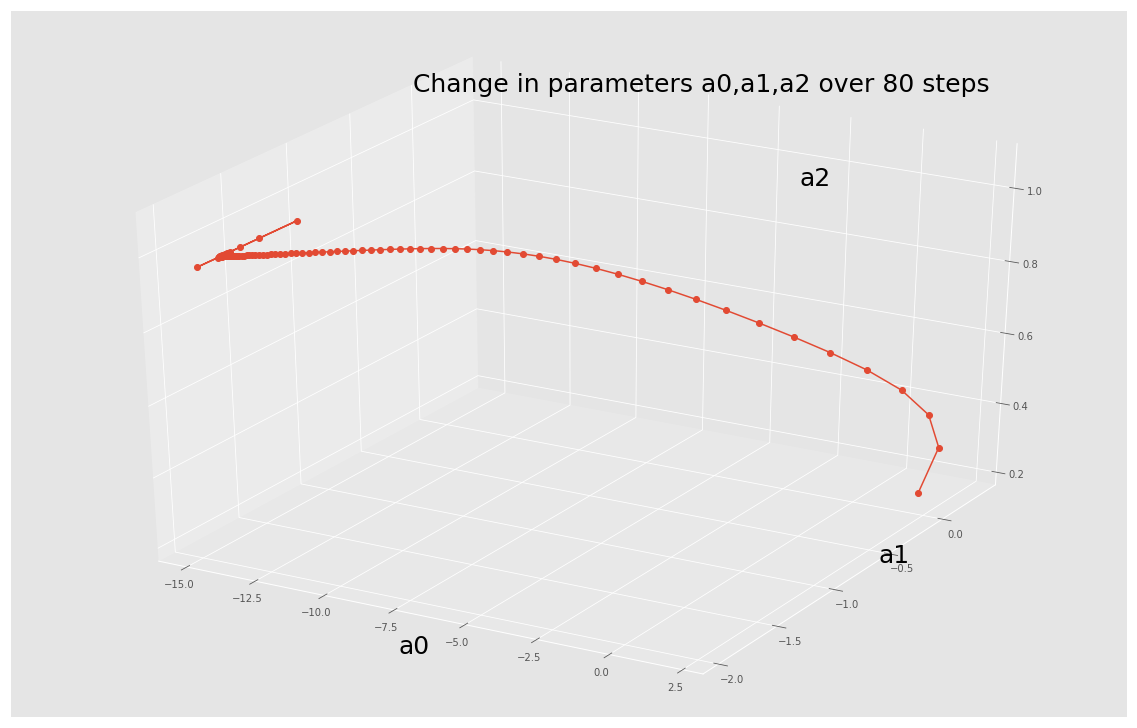

In [77]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
parachange = fig.add_subplot(111, projection='3d')
# parachange.text(x=0, y=0, z=0, text="red", color='red')
parachange.plot(xs=learn['new_a0'].values,ys=learn['new_a1'].values,zs=learn['new_a2'].values,marker='o')
parachange.text(1, 0, 0, s='a1', zdir=None, size=25)
parachange.text(-8, -2, 0, s='a0', zdir=None, size=25)
parachange.text(-8, 1.5, 0.7, s='a2', zdir=None, size=25)
parachange.text(-16, 0, 1.1, s='Change in parameters a0,a1,a2 over 80 steps', zdir=None, size=25)

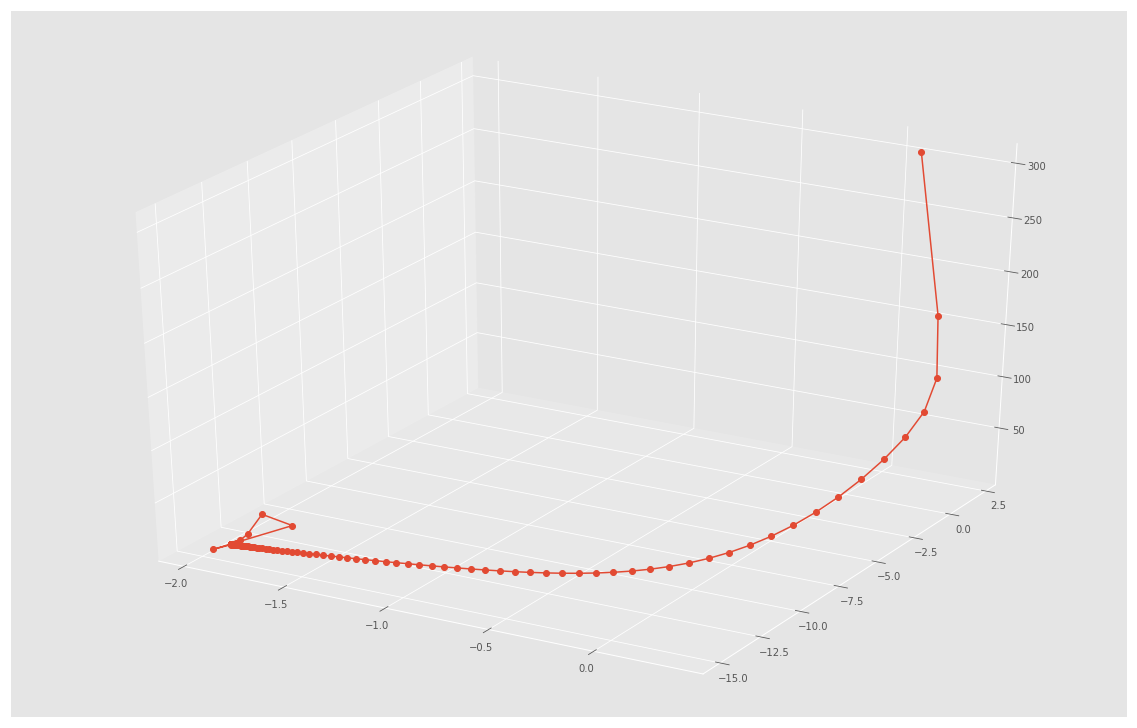

In [78]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
parachange = fig.add_subplot(111, projection='3d')
parachange.plot(xs=learn['new_a1'].values,ys=learn['new_a0'].values,zs=learn['Cost function'].values,marker='o')

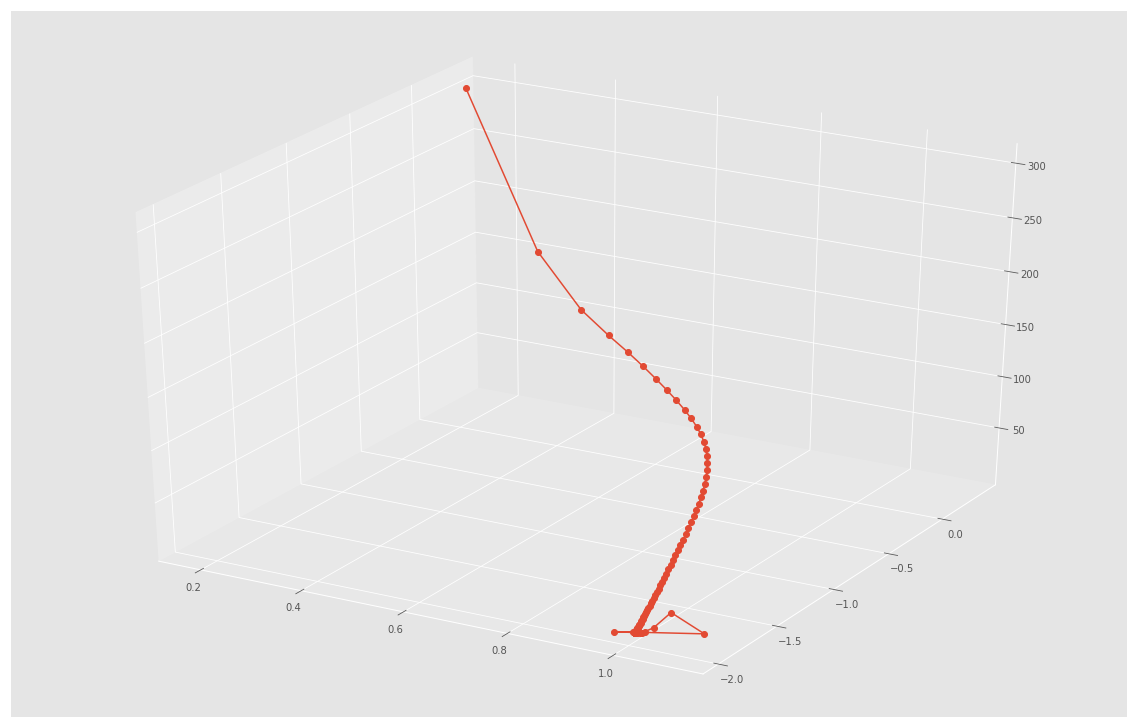

In [79]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
parachange = fig.add_subplot(111, projection='3d')
parachange.plot(xs=learn['new_a2'].values,ys=learn['new_a1'].values,zs=learn['Cost function'].values,marker='o')

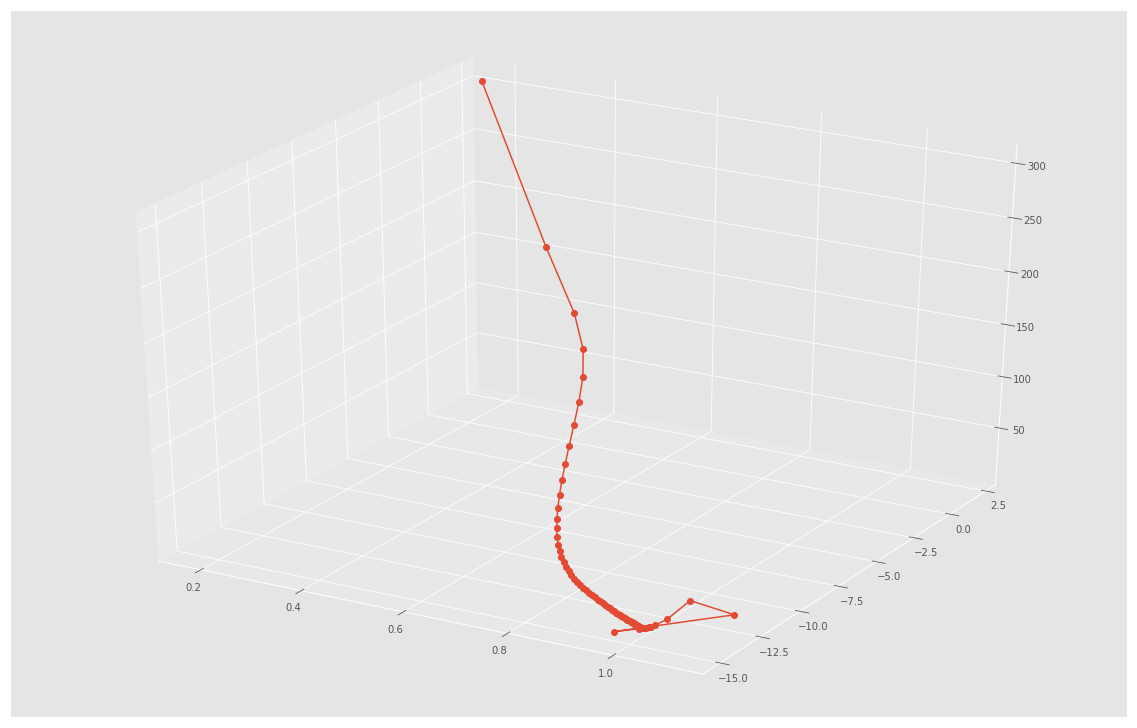

In [80]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
parachange = fig.add_subplot(111, projection='3d')
parachange.plot(xs=learn['new_a2'].values,ys=learn['new_a0'].values,zs=learn['Cost function'].values,marker='o')